<a href="https://colab.research.google.com/github/kaushikpichumani/Chronos-Forecasting/blob/main/Chronos_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: !pip install git+https://github.com/amazon-science/chronos-forecasting.git

!pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-lnao6mx5
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-lnao6mx5
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 96cedec3fa9795c9bd58650080643e2b68bd3a6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [90]:


pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df2 = df.tail(12)
df.drop(df.tail(12).index,inplace = True)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 12
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)



In [95]:
df2

,Month,#Passengers
132,1960-01,417
133,1960-02,391
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461


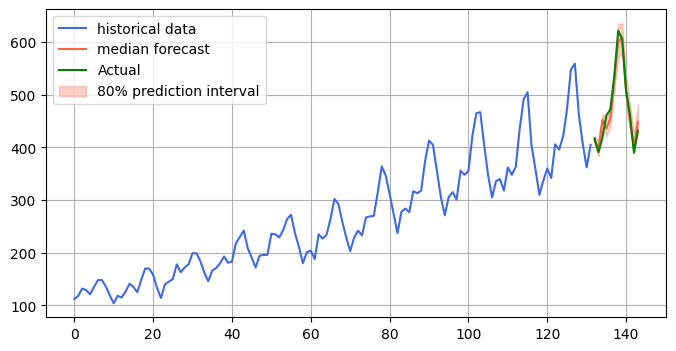

In [94]:
plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.plot(df2["#Passengers"], color="green", label="Actual")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [30]:
rms = sqrt(mean_squared_error(df2["#Passengers"], median, squared=False))

In [31]:
rms

4.306428452273931

############### Stock Prediction #############

In [96]:
import yfinance as yf

In [111]:
tickerSymbol = 'AMD'

data = yf.download('AAPL','2000-01-01','2024-03-01',interval='1wk')

[*********************100%%**********************]  1 of 1 completed


In [112]:
data.shape

(1261, 6)

In [116]:
data = data.reset_index()

In [117]:


pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)


data_2 = data.tail(50)
data.drop(data.tail(50).index,inplace = True)
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(data["Close"])
prediction_length = 50
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(data), len(data) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)



In [118]:
forecast_index

range(1161, 1211)

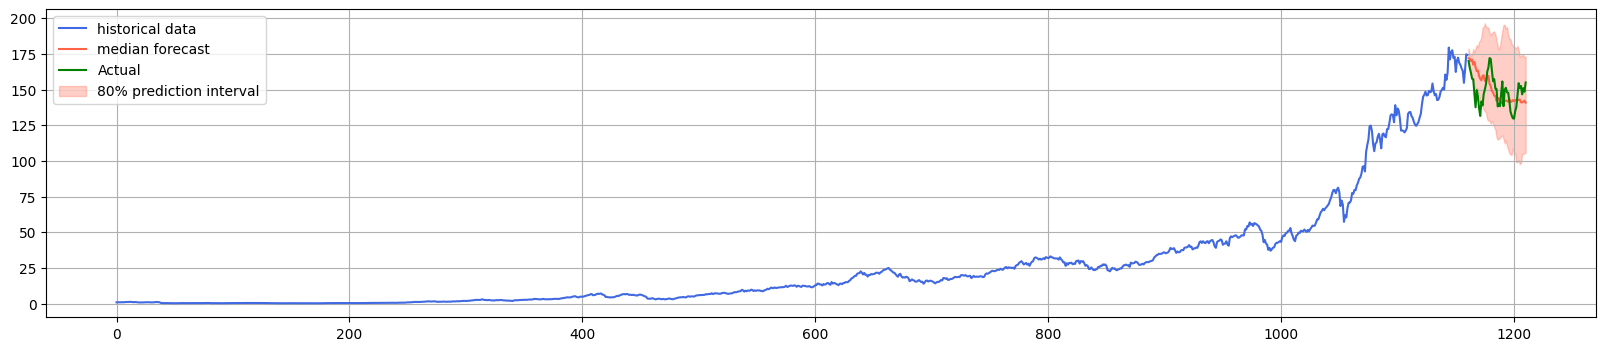

In [119]:
plt.figure(figsize=(20, 4))
plt.plot(data["Close"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.plot(data_2["Close"], color="green", label="Actual")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [120]:
forecast_index

range(1161, 1211)

In [121]:
rms = (mean_squared_error(data_2["Close"], median, squared=False))

In [122]:
print(rms)

12.065165288270684


In [123]:
data_2["Predicted"] = median

<ipython-input-123-547fad0de02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Predicted"] = median


In [124]:
data_2[["Close","Predicted"]]

,Close,Predicted
1161,170.089996,171.989942
1162,165.289993,171.794276
1163,161.789993,170.033289
1164,157.649994,171.011615
1165,157.279999,167.489634
1166,147.110001,169.446293
1167,137.589996,165.728647
1168,149.639999,162.989326
1169,145.380005,163.380657
1170,137.130005,159.663017


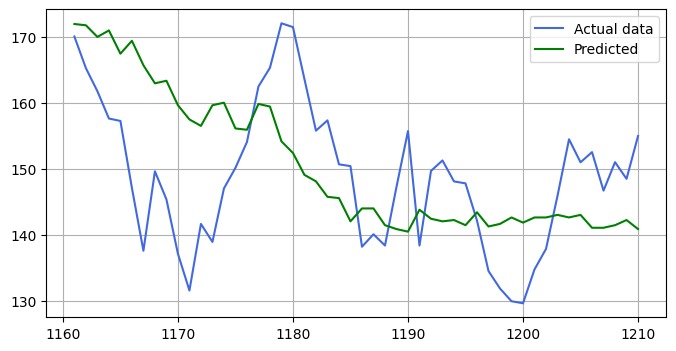

In [126]:
plt.figure(figsize=(8, 4))
plt.plot(data_2["Close"], color="royalblue", label="Actual data")
plt.plot(data_2["Predicted"], color="green", label="Predicted")
plt.legend()
plt.grid()
plt.show()

In [127]:
print((mean_squared_error(data_2["Close"], data_2["Predicted"], squared=False)))

12.065165288270684


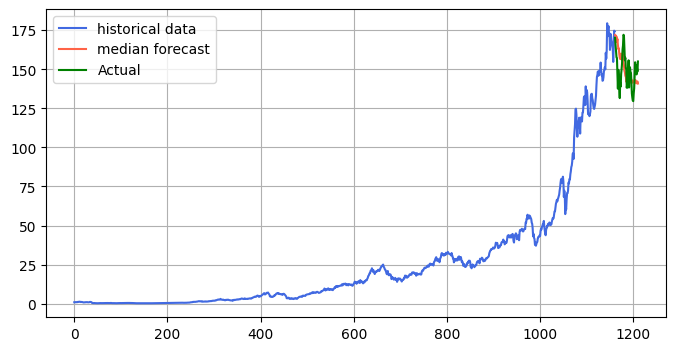

In [128]:
plt.figure(figsize=(8, 4))
plt.plot(data["Close"], color="royalblue", label="historical data")
plt.plot(data_2["Predicted"], color="tomato", label="median forecast")
plt.plot(data_2["Close"], color="green", label="Actual")

plt.legend()
plt.grid()
plt.show()

############# weekly performs better than monthly #########


In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls

sample_data


In [11]:
data = pd.read_csv("/content/drive/MyDrive/Historical Product Demand.csv")

In [19]:
data[data["Product_Code"]=="Product_0979"]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
...,...,...,...,...,...
1046235,Product_0979,Whse_J,Category_028,2016/10/5,100
1046242,Product_0979,Whse_J,Category_028,2016/11/8,700
1046245,Product_0979,Whse_J,Category_028,2016/11/14,300
1046253,Product_0979,Whse_J,Category_028,2016/12/9,200


In [2]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-mcodaxtf
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-mcodaxtf
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 96cedec3fa9795c9bd58650080643e2b68bd3a6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


fatal: destination path 'Chronos-Forecasting' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
